In [1]:
%pip install --upgrade pip
%pip install python2verilog==0.1.9

Agent pid 210020
Identity added: /home/kerrwang/.ssh/id_ed25519 (Kerry.Wang@amd.com)
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Agent pid 210035
Identity added: /home/kerrwang/.ssh/id_ed25519 (Kerry.Wang@amd.com)
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
from typing import Optional
from python2verilog import verilogify, context_to_text_and_file

In [3]:
def make_visual(generator_inst, directory: Optional[str] = None):
    """
    Any iterable of tuples where the tuples are of length > 0 will work.
    Visualizes the first 3 elements of each tuple as (x, y, colour)
    """

    # Generate the data using the generator function
    data_triple_list = []

    for idx, yields in enumerate(generator_inst):
        if isinstance(yields, int):
            yields = (yields,)
        if len(yields) >= 3:
            data_triple_list.append(yields[:3])
        elif len(yields) >= 2:
            data_triple_list.append((*yields[:2], 1))
        else:
            data_triple_list.append((yields[0], idx, 1))

    data_triple = np.array(data_triple_list)

    try:
        height = max(data_triple[:, 0])
        width = max(data_triple[:, 1])
        grid = np.zeros((int(height) + 1, int(width) + 1))
        for x_coord, y_coord, colour in data_triple:
            grid[x_coord, y_coord] = colour

        # Create the pixel-like plot
        plt.imshow(grid)

        # Set labels and title
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Pixel-like Plot")

        # Add color bar
        cbar = plt.colorbar()
        cbar.set_label("Z")

        plt.gca().invert_yaxis()

        # Show the plot
        plt.show()
        if directory: 
            plt.savefig(directory)

        plt.clf()
        plt.cla()
        plt.close()
        
    except IndexError as e:
        print(
            f"Skipping make_visual for {str(generator_inst)} due to negative outputs {e}",
        )

x: 33, y: 31, radius: 30
[(78, 40), (48, 70), (18, 40), (48, 70), (18, 40), (48, 10), (78, 40), (48, 10), (78, 41), (49, 70), (18, 41), (47, 70), (18, 39), (47, 10), (78, 39), (49, 10), (78, 42), (50, 70), (18, 42), (46, 70), (18, 38), (46, 10), (78, 38), (50, 10), (78, 43), (51, 70), (18, 43), (45, 70), (18, 37), (45, 10), (78, 37), (51, 10), (78, 44), (52, 70), (18, 44), (44, 70), (18, 36), (44, 10), (78, 36), (52, 10), (78, 45), (53, 70), (18, 45), (43, 70), (18, 35), (43, 10), (78, 35), (53, 10), (77, 46), (54, 69), (19, 46), (42, 69), (19, 34), (42, 11), (77, 34), (54, 11), (77, 47), (55, 69), (19, 47), (41, 69), (19, 33), (41, 11), (77, 33), (55, 11), (77, 48), (56, 69), (19, 48), (40, 69), (19, 32), (40, 11), (77, 32), (56, 11), (77, 49), (57, 69), (19, 49), (39, 69), (19, 31), (39, 11), (77, 31), (57, 11), (76, 50), (58, 68), (20, 50), (38, 68), (20, 30), (38, 12), (76, 30), (58, 12), (76, 51), (59, 68), (20, 51), (37, 68), (20, 29), (37, 12), (76, 29), (59, 12), (76, 52), (60,

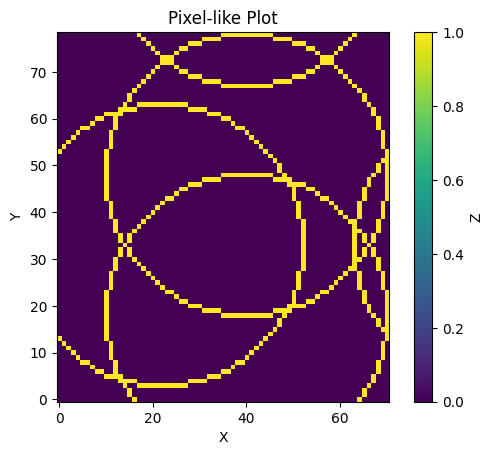

x: 79, y: 41, radius: 30
[(124, 50), (94, 80), (64, 50), (94, 80), (64, 50), (94, 20), (124, 50), (94, 20), (124, 51), (95, 80), (64, 51), (93, 80), (64, 49), (93, 20), (124, 49), (95, 20), (124, 52), (96, 80), (64, 52), (92, 80), (64, 48), (92, 20), (124, 48), (96, 20), (124, 53), (97, 80), (64, 53), (91, 80), (64, 47), (91, 20), (124, 47), (97, 20), (124, 54), (98, 80), (64, 54), (90, 80), (64, 46), (90, 20), (124, 46), (98, 20), (124, 55), (99, 80), (64, 55), (89, 80), (64, 45), (89, 20), (124, 45), (99, 20), (123, 56), (100, 79), (65, 56), (88, 79), (65, 44), (88, 21), (123, 44), (100, 21), (123, 57), (101, 79), (65, 57), (87, 79), (65, 43), (87, 21), (123, 43), (101, 21), (123, 58), (102, 79), (65, 58), (86, 79), (65, 42), (86, 21), (123, 42), (102, 21), (123, 59), (103, 79), (65, 59), (85, 79), (65, 41), (85, 21), (123, 41), (103, 21), (122, 60), (104, 78), (66, 60), (84, 78), (66, 40), (84, 22), (122, 40), (104, 22), (122, 61), (105, 78), (66, 61), (83, 78), (66, 39), (83, 22), 

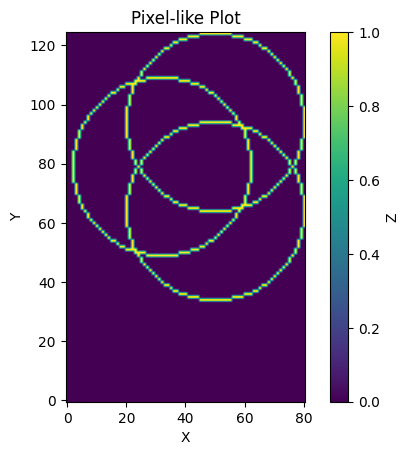

x: 78, y: 42, radius: 30
[(123, 51), (93, 81), (63, 51), (93, 81), (63, 51), (93, 21), (123, 51), (93, 21), (123, 52), (94, 81), (63, 52), (92, 81), (63, 50), (92, 21), (123, 50), (94, 21), (123, 53), (95, 81), (63, 53), (91, 81), (63, 49), (91, 21), (123, 49), (95, 21), (123, 54), (96, 81), (63, 54), (90, 81), (63, 48), (90, 21), (123, 48), (96, 21), (123, 55), (97, 81), (63, 55), (89, 81), (63, 47), (89, 21), (123, 47), (97, 21), (123, 56), (98, 81), (63, 56), (88, 81), (63, 46), (88, 21), (123, 46), (98, 21), (122, 57), (99, 80), (64, 57), (87, 80), (64, 45), (87, 22), (122, 45), (99, 22), (122, 58), (100, 80), (64, 58), (86, 80), (64, 44), (86, 22), (122, 44), (100, 22), (122, 59), (101, 80), (64, 59), (85, 80), (64, 43), (85, 22), (122, 43), (101, 22), (122, 60), (102, 80), (64, 60), (84, 80), (64, 42), (84, 22), (122, 42), (102, 22), (121, 61), (103, 79), (65, 61), (83, 79), (65, 41), (83, 23), (121, 41), (103, 23), (121, 62), (104, 79), (65, 62), (82, 79), (65, 40), (82, 23), (1

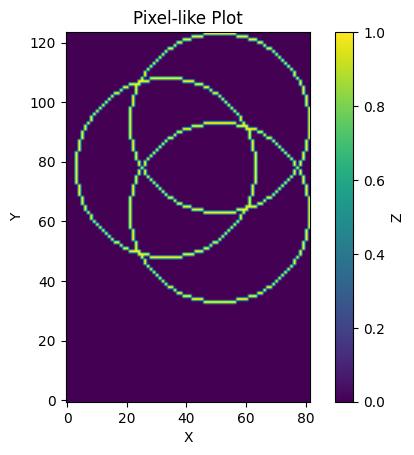

In [8]:
import math


namespace = {}


def draw_circle(centre_x, centre_y, radius):
    offset_y = 0
    offset_x = radius
    crit = 1 - radius
    while offset_y <= offset_x:
        yield (centre_x + offset_x, centre_y + offset_y)  # -- octant 1
        yield (centre_x + offset_y, centre_y + offset_x)  # -- octant 2
        yield (centre_x - offset_x, centre_y + offset_y)  # -- octant 4
        yield (centre_x - offset_y, centre_y + offset_x)  # -- octant 3
        yield (centre_x - offset_x, centre_y - offset_y)  # -- octant 5
        yield (centre_x - offset_y, centre_y - offset_x)  # -- octant 6
        yield (centre_x + offset_x, centre_y - offset_y)  # -- octant 8
        yield (centre_x + offset_y, centre_y - offset_x)  # -- octant 7
        offset_y = offset_y + 1
        if crit <= 0:
            crit = crit + 2 * offset_y + 1
        else:
            offset_x = offset_x - 1
            crit = crit + 2 * (offset_y - offset_x) + 1


def draw_reuleaux_triangle(centre_x, centre_y, radius):
    c_x = centre_x
    c_y = centre_y
    c_x1 = c_x + radius // 2
    c_y1 = c_y + round(radius * math.sqrt(3) / 6)
    c_x2 = c_x - radius // 2
    c_y2 = c_y + round(radius * math.sqrt(3) / 6)
    c_x3 = c_x
    c_y3 = c_y - round(radius * math.sqrt(3) / 6)

    yield from draw_circle(c_x1, c_y1, radius)
    yield from draw_circle(c_x2, c_y2, radius)
    yield from draw_circle(c_x3, c_y3, radius)

for _ in range(3):
    x, y, radius = (
        random.randint(30, 100),
        random.randint(30, 100),
        random.randint(30, 30),
    )
    print(f"x: {x}, y: {y}, radius: {radius}")
    print(list(draw_reuleaux_triangle(x, y, radius)))
    make_visual(draw_reuleaux_triangle(x, y, radius))
